In [39]:
import data_util
from matplotlib import pyplot as plt
from time import time
from sklearn import manifold
import numpy as np
train_x, train_y, test_x, test_y = data_util.load_data()


# 需要合理的划分测试集选取k值 10%
train_x = train_x[:1000]
train_y = train_y[:1000]

In [40]:
# plot 工具 展示二维投影
def plot_embedding(X,y,method,time):
    x_min, x_max = X.min(0), X.max(0)
    X_norm = (X - x_min) / (x_max - x_min)  # 归一化
    plot = plt.figure()
    for i in range(X_norm.shape[0]):
        plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(train_y[i]),
             fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(method + " time cost :(time %.2fs)" %(time))
    plt.show()
    return plot

Org data dimension is 784. Embedded data dimension is 2


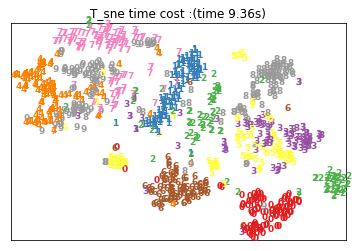

In [41]:
# t_sne

tsne = manifold.TSNE(n_components=2,perplexity=30,init = 'pca', random_state=501)
t0 = time()
tsne_x = tsne.fit_transform(train_x)

print("Org data dimension is {}. "
      "Embedded data dimension is {}".format(train_x.shape[-1], tsne_x.shape[-1]))

'''嵌入空间可视化'''
p1 = plot_embedding(tsne_x,train_y,"T_sne",time()-t0)

Org data dimension is 784. Embedded data dimension is 2


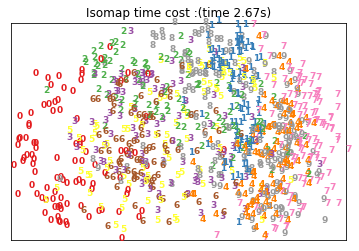

In [48]:
# Isomap projection of the digits dataset
t0 = time()
iso_x= manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(train_x)
print("Org data dimension is {}. "
      "Embedded data dimension is {}".format(train_x.shape[-1], iso_x.shape[-1]))

'''嵌入空间可视化'''
p2 = plot_embedding(iso_x,train_y,"Isomap",time()-t0)

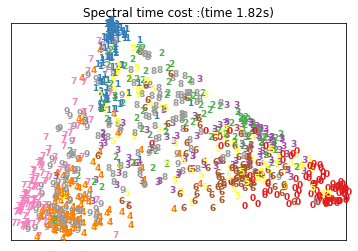

In [49]:
# 谱聚类
spectral = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
spectral_x =  spectral.fit_transform(train_x)
'''嵌入空间可视化'''
p3 = plot_embedding(spectral_x,train_y,"Spectral",time()-t0)

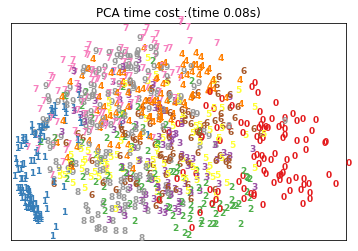

In [44]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
t0 = time()
pca.fit(train_x)
pca_x = pca.transform(train_x)
'''嵌入空间可视化'''
p4 = plot_embedding(pca_x,train_y,"PCA",time()-t0)

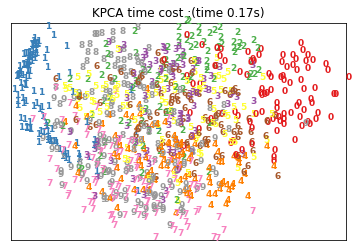

In [45]:
# kernelPCA
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components=2,kernel='sigmoid')
t0 = time()
pca.fit(train_x)
kpca_x = pca.transform(train_x)
'''嵌入空间可视化'''
p5 = plot_embedding(kpca_x,train_y,"KPCA",time()-t0)

C:\Users\Snow\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


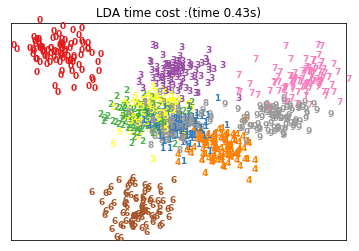

In [46]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
t0 = time()
lda_x =  LDA.fit_transform(train_x,train_y)
'''嵌入空间可视化'''
p6 = plot_embedding(lda_x,train_y,"LDA",time()-t0)

In [ ]:
fig = plt.figure()
fig.add